# PROGETTO BLACK FRIDAY

Come prima cosa importiamo il dataset. 


In [1]:
dati <- read.csv("BlackFriday.csv", header = TRUE)
summary(dati)
dim(dati)

    User_ID            Product_ID     Gender        Age        
 Min.   :1000001   P00265242:  1858   F:132197   0-17 : 14707  
 1st Qu.:1001495   P00110742:  1591   M:405380   18-25: 97634  
 Median :1003031   P00025442:  1586              26-35:214690  
 Mean   :1002992   P00112142:  1539              36-45:107499  
 3rd Qu.:1004417   P00057642:  1430              46-50: 44526  
 Max.   :1006040   P00184942:  1424              51-55: 37618  
                   (Other)  :528149              55+  : 20903  
   Occupation     City_Category Stay_In_Current_City_Years Marital_Status  
 Min.   : 0.000   A:144638      0 : 72725                  Min.   :0.0000  
 1st Qu.: 2.000   B:226493      1 :189192                  1st Qu.:0.0000  
 Median : 7.000   C:166446      2 : 99459                  Median :0.0000  
 Mean   : 8.083                 3 : 93312                  Mean   :0.4088  
 3rd Qu.:14.000                 4+: 82889                  3rd Qu.:1.0000  
 Max.   :20.000                 

[1] 537577     12

In [2]:
dati$Product_Category_1 <- as.factor(dati$Product_Category_1)
summary(dati$P)

1      2      3      4      5      6      7      8      9     10     11 
138353  23499  19849  11567 148592  20164   3668 112132    404   5032  23960 
    12     13     14     15     16     17     18 
  3875   5440   1500   6203   9697    567   3075

In [3]:
dati$Product_Category_2 <- as.factor(dati$Product_Category_2)
summary(dati$Product_Category_2)

2      3      4      5      6      7      8      9     10     11     12 
 48481   2835  25225  25874  16251    615  63058   5591   2991  13945   5419 
    13     14     15     16     17     18   NA's 
 10369  54158  37317  42602  13130   2730 166986

In [4]:
dati$Product_Category_3 <- as.factor(dati$Product_Category_3)
summary(dati$Product_Category_3)

3      4      5      6      8      9     10     11     12     13     14 
   600   1840  16380   4818  12384  11414   1698   1773   9094   5385  18121 
    15     16     17     18   NA's 
 27611  32148  16449   4563 373299

Vediamo un po' quali variabili abbiamo:
- User_ID = codice identificativo del cliente (magari vedere se un cliente ha acquistato più volte o se sono tutti diversi)
- Product_ID = codice identificativo del prodotto acquistato (anche qua potrebbe essere interessante vedere quanti prodotti diversi ci sono)
- Gender = genere del cliente
- Age = classi di età (questo vuol dire che il problema 4 è unn problema di classificazione. )
- Occupation =  lavoro del cliente. Cercare di capire cosa cazzo vuol dire che è numerica
- City_Category =  wtf? Potrebbe essere grande - media - piccola (?!)
- Stay_In_Current_City_Years =  quanti anni è stato il cliente nella città in cui risiede. Variabile categorica. 
- 
- 


In [12]:
head(dati)

User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1000001,P00069042,F,0-17,10,A,2,0,3,NA,NA,8370
1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
1000001,P00087842,F,0-17,10,A,2,0,12,NA,NA,1422
1000001,P00085442,F,0-17,10,A,2,0,12,14,NA,1057
1000002,P00285442,M,55+,16,C,4+,0,8,NA,NA,7969
1000003,P00193542,M,26-35,15,A,3,0,1,2,NA,15227


Guardando i dati così dall'alto possiamo vedere come ci siano dei dati mancanti. Per poter capire meglio quali e quanti siano andiamo a fare un po' di conti. 


In [13]:
dim(dati)

[1] 537577     12

## VALORI MANCANTI

In [14]:
missing_values = rep(0,12)
for(i in 1:12){
   missing_values[i] = sum(is.na(dati[,i]))

}
for(i in 1:12){
    print(paste(colnames(dati)[i],missing_values[i]))
}

[1] "User_ID 0"
[1] "Product_ID 0"
[1] "Gender 0"
[1] "Age 0"
[1] "Occupation 0"
[1] "City_Category 0"
[1] "Stay_In_Current_City_Years 0"
[1] "Marital_Status 0"
[1] "Product_Category_1 0"
[1] "Product_Category_2 166986"
[1] "Product_Category_3 373299"
[1] "Purchase 0"


Quindi le uniche colonne che presentano valori mancanti sono le colonne Product_Category2 e Product_Category3. Ma quanti sono in totale questi missing values in percentuale?

In [15]:
n = dim(dati)[1]


In [16]:
percentuale2 = sum(is.na(dati$Product_Category_2)) / n
percentuale3 = sum(is.na(dati$Product_Category_3)) / n
cat("Total rows: ", n,"\n","Prod 2 missing: ", percentuale2 * 100,"% \n",
   "Prod 3 missing: ", percentuale3 * 100, "% \n")

Total rows:  537577 
 Prod 2 missing:  31.06271 % 
 Prod 3 missing:  69.44103 % 


Nella colonna "Product_Category_3" abbiamo una mancanza di circa il 70 %. Occorre tenerne conto nel caso in cui volessimo usare questa viariabile. Magari si potrebbe vedere in base a Prod 1 e Prod 2 come sono i valori della Cat 3 (una sorta di problema di classificazione interno al problema più grande).

Un'altra cosa interessante per quanto riguarda l'analisi delle variabili Product_Category_x potrebbe essere quello di vedere qual è il numero di categorie "uniche".

In [17]:
#install.packages("data.table",repos = "http://cran.us.r-project.org")
#library(data.table)
#install.packages("tidyverse",repos = "http://cran.us.r-project.org")
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.5.2"

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'lattice'


In [ ]:
dati %>% 
    as.tibble() %>% 
    count(Product_Category_2)

In [ ]:
dati %>% 
    as.tibble() %>% 
    count(Product_Category_3)

In [ ]:
dati %>% 
    as.tibble() %>% 
    count(Product_Category_1,Product_Category_2,Product_Category_3)

Possiamo vedere che i valori per le varie categorie cominciano da 1 quindi è possibile utilizzare 0 come valore per le missing informations in modo da poter utilizzare valori numerici. 

In [18]:
#install.packages("OpasnetUtils",repos = "http://cran.us.r-project.org")
library(OpasnetUtils)

Warning message:
"package 'OpasnetUtils' was built under R version 3.5.2"

ERROR: Error: package or namespace load failed for 'OpasnetUtils' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called 'lattice'


In [19]:
 dati[is.na(dati)] <- 0

## DATA TYPES AND REPRESENTATION

Quello che occorre fare ora è andare a studiare le altre variabili per cercare di capire un po' come sono distribuite e di quale tipo sono. Così facendo si avranno più informazioni che saranno utili nella risoluzione del problema. 

### User_ID and Product_ID

In questo caso abbiamo dei codici (il che vuol dire che potremmo considerare questa variabile categorica.) Per avere qualche informazione in più potremmo andare a vedere quanti sono i valori unici all'interno di queste due colonne della matrice.

In [20]:
clienti_unici <- unique(dati$User_ID)
prodotti_unici <- unique(dati$Product_ID)

length(clienti_unici)
length(prodotti_unici)

head(clienti_unici)

[1] 5891

[1] 3623

[1] 1000001 1000002 1000003 1000004 1000005 1000006

Abbiamo quindi circa 6000 utenti e 3600 prodotti diversi. Ricordando che il dataset ha circa mezzo milione di righe questo significa che in media ogni utente ha eseguito 100 acquisti e che ogni prodotto è stato comprato in media 160 volte. 

### Gender, Age, Occupation e City_Category

Qua non occorre andare a vedere particolari tipi visto che sono pretty straight-forward. Sono tutte varibili categoriche.  

### Stay_In_Current_Years

Questa colonna presenta valori come stringhe. Occorre decidere se vogliamo trasformarla in variabili numerica (mantenendo linearità ma perdendo informazioni 4 o + potrebbe essere 11 anni e quindi immaginare errore) oppure possiamo tenerla categorica ma attenzione alla perdità della linearità.

### Marital_Status

Anche qua poco da dire. Potrebbe essere interessante andare ad utilizzare interazione di questa variabile insieme ad altri come età, genere o occupazione. 

## Data Distributions

Vedere meglio le distribuzioni marginali delle varie variabili. Chiaramente per quelle per cui ha senso fare questa cosa : 
- Sesso
- Situa matrimoniale
- Age
- Città
- Residenza
(quelle con poche modalità essenzialmente).

In [21]:
library(ggplot2)
options(scipen = 5)

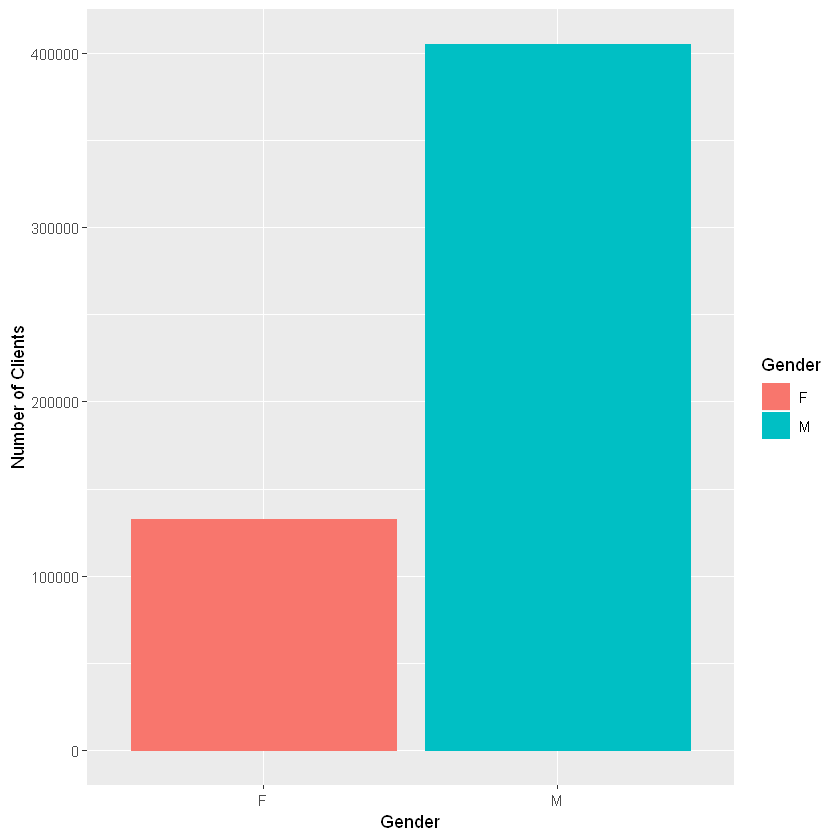

In [22]:
p <- ggplot(dati, aes(x = Gender, color = Gender, fill = Gender)) + 
    geom_bar() +
    ylab("Number of Clients") 

p

Molti più maschi che femmine, ma con il fatto che sono ripetuti alcuni utenti occorre cambiare il dataset per ottenere informazioni più accurate.

In [ ]:
sesso_unico <- dati$Gender[dati$User_ID == clienti_unici]
length(sesso_unico)

In [11]:
tmp <- aggregate(Purchase ~ User_ID, data= dati, sum ) ##COUNTS NUMBER OF PURCHASES
names(tmp) <- c("User_ID", "purchase_count")


purchase_count <- tmp[,2]
friday.users <- merge(tmp, dati, by = "User_ID", all.y = FALSE)
friday.users <- cbind(distinct(dati, User_ID, Age, Gender, Marital_Status, Occupation,
                         City_Category, Stay_In_Current_City_Years), purchase_count)

head(friday.users)

ERROR: Error in distinct(dati, User_ID, Age, Gender, Marital_Status, Occupation, : could not find function "distinct"


In [ ]:
p <- ggplot(friday.users, aes(x = Gender, color = Gender, fill = Gender)) + 
    geom_bar() +
    ylab("Number of Clients") 

p

Frequenze molto diminuite ma comunque prevalenza di maschi. Quasi il doppio. 

### AGE

In [12]:
p2 <- ggplot(friday.users, aes(x = Age, color = Age, fill = Age)) +
    geom_bar() 
   
p2

ERROR: Error in ggplot(friday.users, aes(x = Age, color = Age, fill = Age)): could not find function "ggplot"


La maggior parte dei clienti presenta età compresa tra 26 e i 35. Potrebbe essere interessante vedere come questo si comporta con variabile sesso. 

### AGE + GENDER

In [ ]:
p3 <- ggplot(friday.users, aes(x = Age, fill = Gender)) +
    geom_bar() 
    
p3

### City Category

In [ ]:
p4 <- ggplot(friday.users, aes(x = City_Category, color = City_Category, fill = City_Category)) +
    geom_bar() 
    
p4

Prevalenza di clienti provenienti da città di categoria C.

In [ ]:
p3 <- ggplot(friday.users, aes(x = City_Category, color = Age, fill = Age)) +
    geom_bar() 
    
p3

Inutile.

In [ ]:
friday.users$Marital_Status <- as.factor(ifelse(friday.users$Marital_Status == 1, 'Married', 'Single'))
p5 <- ggplot(friday.users, aes(x = Marital_Status, fill = Marital_Status)) +
    geom_bar() 
    

p5

Più single che sposati. 

In [ ]:
friday.users$Occupation <- as.factor(friday.users$Occupation)
p5 <- ggplot(friday.users, aes(x = Occupation, fill = Occupation)) +
    geom_bar() 

p5

SArebbe interessante scoprire cosa vogliono dire tutti questi numeretti magari per capire reddito di ogni classe occupazionale.

In [ ]:
friday.users$Stay_In_Current_City_Years <- as.factor(friday.users$Stay_In_Current_City_Years)
p6 <- ggplot(friday.users, aes(x = Stay_In_Current_City_Years, fill = Stay_In_Current_City_Years)) +
    geom_bar() 
p6

Interessante notare come la modalità 4 + che dovrebbe poter creare problemi in realtà rappresenta una piccola percentuale della popolazione complessiva.  

# DATA 

Visto che dobbiamo andare a creare un modello per predirre la variabile purchase andiamo adesso a plottare le varie variabili in funzione di purchase.

In [ ]:
head(dati)

In [ ]:
p9 <- ggplot(dati, aes(x = Gender, y = Purchase, fill = Gender)) +
    geom_boxplot()

p9

In [ ]:
p10 <- ggplot(dati, aes(x=Purchase, fill = Gender)) + 
        #geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
         #          binwidth=.5,
         #          colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")

p10

In [ ]:
uomini <- dati[dati$Gender == "M",]

head(uomini)

In [ ]:
p10 <- ggplot(uomini, aes(x=Purchase, fill = Gender)) + 
        #geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
         #          binwidth=.5,
         #          colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")

p10

In [ ]:
donne <- dati[dati$Gender == "F",]

In [ ]:
p10 <- ggplot(donne, aes(x=Purchase)) + 
        #geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
         #          binwidth=.5,
         #          colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")

p10

In [ ]:
library(reshape2)

In [ ]:
#install.packages("plotly", repos ="http://cran.us.r-project.org" )
library(plotly)

In [3]:
attach(dati)

fit <- aov(Purchase ~ Stay_In_Current_City_Years, data=dati)

summary(fit)

                               Df    Sum Sq   Mean Sq F value   Pr(>F)    
Stay_In_Current_City_Years      4 1.026e+09 256572659   10.34 2.26e-08 ***
Residuals                  537572 1.334e+13  24808857                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [2]:
dati$Gender <- as.factor(dati$Gender)
dati$Product_Category_1 <- as.factor(dati$Product_Category_1)
dati$Occupation <- as.factor(dati$Occupation)
dati$Marital_Status <- as.factor(dati$Marital_Status)
dati$City_Category <- as.factor(dati$City_Category)
dati$Product_Category_2 <- as.factor(dati$Product_Category_2)
dati$Product_Category_3 <- as.factor(dati$Product_Category_3)
dati$Age <- as.factor(dati$Age)
dati$Stay_In_Current_City_Years <- as.factor(dati$Stay_In_Current_City_Years)

In [3]:
attach(dati)
fit1 <- aov(Purchase ~ Stay_In_Current_City_Years, data=dati)
fit2 <- aov(Purchase ~ Gender, data=dati)
fit3 <- aov(Purchase ~ Product_Category_1, data=dati)
fit4 <- aov(Purchase ~ Occupation, data=dati)
fit5 <- aov(Purchase ~ Marital_Status, data=dati)
fit6 <- aov(Purchase ~ City_Category, data=dati)
fit7 <- aov(Purchase ~ Product_Category_2, data=dati)
fit <- aov(Purchase ~ Age, data=dati)
fit <- aov(Purchase ~ Product_Category_3, data=dati)
fit <- aov(Purchase ~ Gender, data=dati)

In [ ]:
 p11 <- ggplot(, aes(Purchase, fill = Gender)) + geom_density(alpha = 0.2)

p11



Vediamo che gli acquisti di uomini e donne sono più o meno gli stessi.

In [ ]:
p12 <- ggplot(dati, aes(Purchase, fill = Age)) + geom_density(alpha = 0.2)

p12

In [ ]:
p12 <- ggplot(dati, aes(x = Age,y = Purchase, fill = Age)) + geom_boxplot()

p12

In [ ]:
fit <- aov(Purchase ~ Age, data=dati)
summary(fit)

Osservando risultati anova sembra esserci una differenza significativa tra la spesa e l'appartenenza ad una determinata classe d'età.

In [ ]:
dati$Marital_Status <- as.factor(dati$Marital_Status)

p13 <- ggplot(dati, aes(x = Purchase, fill = Marital_Status)) + geom_density(alpha = 0.2)

p13

Anche qua non ci sono particolari differenze

In [ ]:
dati$City_Category <- as.factor(dati$City_Category)

p14 <- ggplot(dati, aes(x = Purchase, fill = City_Category)) + geom_density(alpha = 0.2)

p14

No particolari differenze 

In [ ]:
dati$Product_Category_1 <- as.factor(dati$Product_Category_1)

p15 <- ggplot(dati, aes(x = Purchase, fill = Product_Category_1)) + geom_density(alpha = 0.2)

p15

Si notano comportamenti molto diversi a seconda della categoria.

In [ ]:
dati$Product_Category_2 <- as.factor(dati$Product_Category_2)

p15 <- ggplot(dati, aes(x = Purchase, fill = Product_Category_2)) + geom_density(alpha = 0.2)

p15

Notiamo comportamenti meno simili rispetto a quelli osservati nel Product1. Dobbiamo inoltre ricordarci che quando leggiamo 0 in realtà stiamo leggendo i valori mancanti

In [ ]:
dati$Product_Category_3 <- as.factor(dati$Product_Category_3)

p15 <- ggplot(dati, aes(x = Purchase, fill = Product_Category_3)) + geom_density(alpha = 0.2)

p15

Anche qua i comportamenti tendono ad essere molto più simili. Sempre ricordare dello 0 = NA

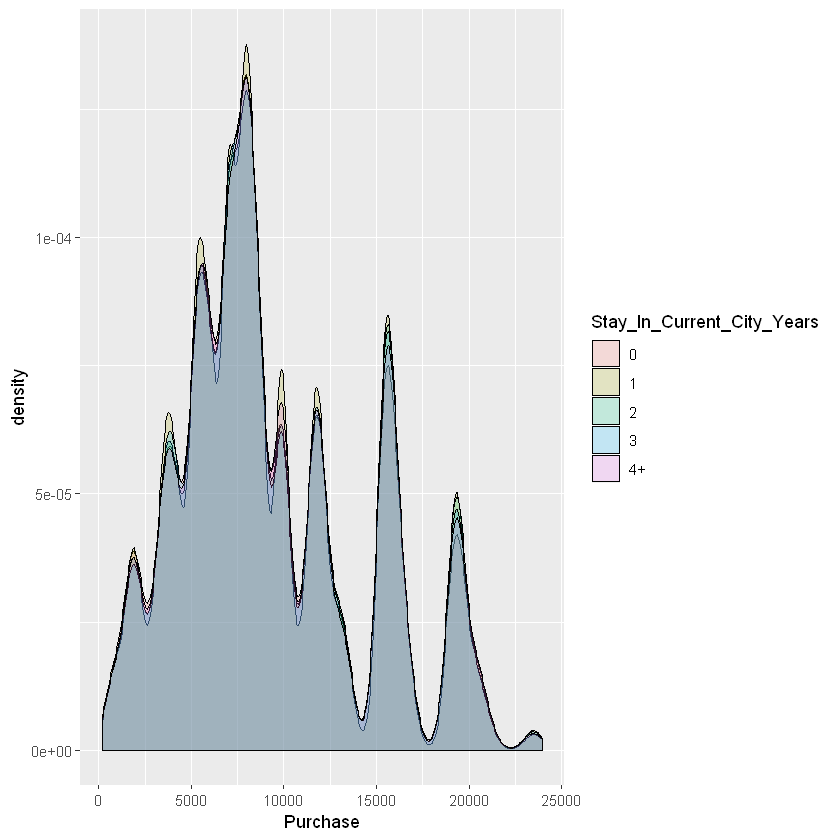

In [26]:
library(ggplot2)
dati$Stay_In_Current_City_Years <- as.factor(dati$Stay_In_Current_City_Years)

p15 <- ggplot(dati, aes(x = Purchase, fill = Stay_In_Current_City_Years)) + geom_density(alpha = 0.2)

p15

In [28]:
install.packages("coin",repos = "http://cran.us.r-project.org")

also installing the dependencies 'TH.data', 'sandwich', 'modeltools', 'mvtnorm', 'multcomp'



package 'TH.data' successfully unpacked and MD5 sums checked
package 'sandwich' successfully unpacked and MD5 sums checked
package 'modeltools' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'multcomp' successfully unpacked and MD5 sums checked
package 'coin' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ziki\AppData\Local\Temp\RtmpCiLqKe\downloaded_packages


In [32]:
#install.packages("lattice",repos = "http://cran.us.r-project.org")

package 'lattice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ziki\AppData\Local\Temp\RtmpCiLqKe\downloaded_packages


In [33]:

library(coin)

independence_test(Purchase ~ Stay_In_Current_City_Years,
                  data = dati)

Warning message:
"package 'coin' was built under R version 3.5.2"Loading required package: survival



	Asymptotic General Independence Test

data:  Purchase by
	 Stay_In_Current_City_Years (0, 1, 2, 3, 4+)
maxT = 5.0433, p-value = 2.167e-06
alternative hypothesis: two.sided


In [35]:
foldername <- 'C:/Users/ziki/Desktop/MAGISTRALE/PRIMO_SEMESTRE/MLDA/ESAME/PACKAGE'
install.packages(paste(foldername , 'h20',sep='/'), repos = NULL, type="source")

Warning message in install.packages(paste(foldername, "h20", sep = "/"), repos = NULL, :
"installation of package 'C:/Users/ziki/Desktop/MAGISTRALE/PRIMO_SEMESTRE/MLDA/ESAME/PACKAGE/h20' had non-zero exit status"

In [34]:
library(h20, lib.loc='C:/Users/ziki/Downloads/h2o_3.20.0.8.tar.gz')

ERROR: Error in library(h20, lib.loc = "C:/Users/ziki/Downloads/h2o_3.20.0.8.tar.gz"): no library trees found in 'lib.loc'


## DATA PREPARTION 

Creiamo dataset unico così non ripetiamo la stessa persona

In [ ]:
EDA_Distinct <- distinct(dati, User_ID, Age, Gender, Marital_Status,
                         Occupation, City_Category, Stay_In_Current_City_Years)
head(EDA_Distinct)

In [ ]:
userIDCount <- as.data.frame(table(dati$User_ID))
names(userIDCount) <- c("User_ID", "User_Purchase_Count")
head(userIDCount)

In [ ]:
dati <- merge(x = dati, y = userIDCount, by = "User_ID", all.x = TRUE)

In [ ]:
EDA_Distinct <- distinct(dati, User_ID, Age, Gender, Marital_Status, Occupation, City_Category, Stay_In_Current_City_Years, User_Purchase_Count)

In [ ]:
#install.packages("reshape2", repos = "http://cran.us.r-project.org")
library(reshape2)

In [ ]:
d1 <- summary(friday.users$User_Purchase_Count)

p1 <- ggplot(EDA_Distinct, aes(x=User_Purchase_Count)) +geom_density(fill="red", col="black", alpha=0.80) + annotate(geom = "text", x = 6, y = 0.0125, label = "Min")  + annotate(geom = "text", x = 24, y = 0.013, label = "1st Qu.") + annotate(geom = "text", x = 50, y = 0.0125, label = "Median") + annotate(geom = "text", x = 90, y = 0.013, label = "Mean") + annotate(geom = "text", x = 112, y = 0.0125, label = "3rd Qu.") + annotate(geom = "text", x = 1015, y = 0.0125, label = "Max") + geom_vline(xintercept = c(6, 26, 54, 93.37, 117, 1026), size = 0.2, col = 'black') #+ lims(x = )

p2 <- ggplot(EDA_Distinct, aes(x=User_Purchase_Count)) +geom_histogram(fill="red", col="black", alpha=0.80) 

p3 <- ggplot(EDA_Distinct,aes(x= Age,y=User_Purchase_Count, fill=Age)) + geom_boxplot() + facet_grid(Gender~Marital_Status) + labs(x="Age",y="Customer Purchase Count")

p4 <- ggplot(EDA_Distinct,aes(x= Occupation,y=User_Purchase_Count, fill=Occupation)) + geom_boxplot() + facet_grid(Gender~Marital_Status) + labs(x="Occupation",y="Customer Purchase Count")

p5 <- ggplot(EDA_Distinct,aes(x=Age,y=User_Purchase_Count,fill=Stay_In_Current_City_Years))+geom_boxplot()+facet_grid(City_Category~ Stay_In_Current_City_Years) + labs(x="Age",y="Customer Purchase Count")

p5i <- ggplot(EDA_Distinct,aes(x=Age,y=User_Purchase_Count,fill=Stay_In_Current_City_Years))+geom_boxplot()+facet_grid( Stay_In_Current_City_Years ~ City_Category) + labs(x="Age",y="Customer Purchase Count")

p6 <- ggplot(EDA_Distinct,aes(x=Age,y=User_Purchase_Count,fill=Marital_Status))+geom_boxplot()+facet_grid(Gender~City_Category) + scale_fill_manual(values=c("tan4","limegreen"))  + labs(x="Age",y="Customer Purchase Count")

#grid.arrange(p1, p2, p3, p4 ,p5i ,p6, ncol = 1, nrow = 6); 
d1;p1;p2;p3;p4;p5;p5i;p6